#Clustering

## DBSCAN

Ukuran dataset: (16, 16)
Nilai minimum: 1.3, Nilai maksimum: 21.3
Parameter terbaik: eps=4.50, min_samples=2
Jumlah cluster: 4
Skor Silhouette: 0.4382
Cluster 1: [1, 2, 3]
Cluster 2: [4, 5, 6, 7, 8]
Cluster 3: [10, 11]
Cluster 4: [12, 13, 14, 15]


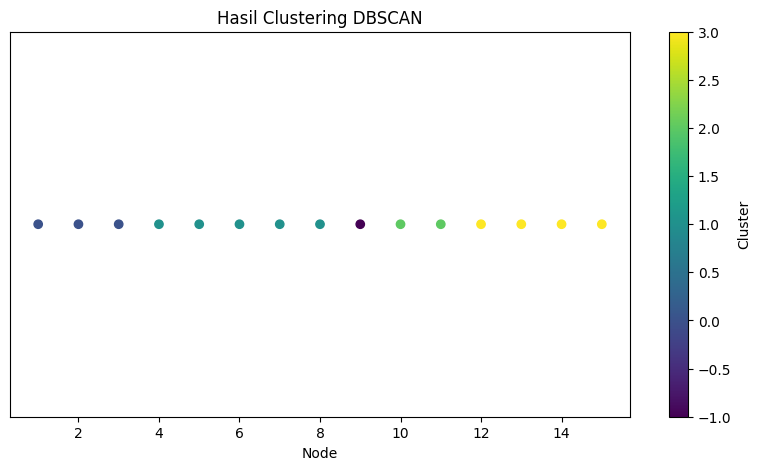

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def baca_dataset(nama_file):
    with open(nama_file, 'r') as file:
        lines = file.readlines()

    data = [list(map(lambda x: float(x) if x != 'inf' else np.inf, line.strip().split())) for line in lines]
    return np.array(data)

def make_symmetric(matrix):
    return (matrix + matrix.T) / 2

def asymmetric_dbscan(dist_matrix, eps, min_samples):
    # Membuat matriks simetris
    sym_matrix = make_symmetric(dist_matrix)

    # Mengganti nilai tak terhingga dengan nilai maksimum yang bukan tak terhingga
    max_finite = np.max(sym_matrix[np.isfinite(sym_matrix)])
    sym_matrix[np.isinf(sym_matrix)] = max_finite

    # Mengisi diagonal matriks dengan nol
    np.fill_diagonal(sym_matrix, 0)

    # Melakukan DBSCAN tanpa node 0
    clustering = DBSCAN(eps=eps, min_samples=int(min_samples), metric='precomputed')
    labels = clustering.fit_predict(sym_matrix[1:, 1:])

    return labels

def evaluate_clustering(dist_matrix, labels):
    # Mengganti nilai tak terhingga dengan nilai maksimum yang bukan tak terhingga
    max_finite = np.max(dist_matrix[np.isfinite(dist_matrix)])
    dist_matrix_copy = dist_matrix.copy()
    dist_matrix_copy[np.isinf(dist_matrix_copy)] = max_finite

    # Mengisi diagonal matriks dengan nol
    np.fill_diagonal(dist_matrix_copy, 0)

    # Hanya menghitung skor Silhouette jika ada lebih dari satu cluster
    if len(np.unique(labels)) > 1:
        return silhouette_score(dist_matrix_copy[1:, 1:], labels, metric='precomputed')
    else:
        return -1  # Nilai default jika hanya ada satu cluster

def main():
    # Membaca dataset
    dataset = baca_dataset("/content/NEW Dataset.txt")
    print(f"Ukuran dataset: {dataset.shape}")
    print(f"Nilai minimum: {np.min(dataset[np.isfinite(dataset)])}, Nilai maksimum: {np.max(dataset[np.isfinite(dataset)])}")

    # Mencoba berbagai nilai eps dan min_samples
    eps_range = np.linspace(0.5, 5, 10)
    min_samples_range = range(2, 6)

    results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            labels = asymmetric_dbscan(dataset, eps, min_samples)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Tidak menghitung noise sebagai cluster
            score = evaluate_clustering(dataset, labels)
            results.append((eps, min_samples, n_clusters, score))

    results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'n_clusters', 'silhouette_score'])

    # Memilih parameter terbaik berdasarkan skor Silhouette
    best_params = results_df.loc[results_df['silhouette_score'].idxmax()]

    print(f"Parameter terbaik: eps={best_params['eps']:.2f}, min_samples={int(best_params['min_samples'])}")
    print(f"Jumlah cluster: {int(best_params['n_clusters'])}")
    print(f"Skor Silhouette: {best_params['silhouette_score']:.4f}")

    # Melakukan clustering final dengan parameter terbaik
    final_labels = asymmetric_dbscan(dataset, best_params['eps'], int(best_params['min_samples']))

    # Menampilkan hasil
    unique_labels = set(final_labels)
    for i in unique_labels:
        if i != -1:  # Mengabaikan noise points
            nodes_in_cluster = np.where(final_labels == i)[0] + 1  # Menambahkan 1 untuk menyesuaikan indeks
            print(f"Cluster {i+1}: {nodes_in_cluster.tolist()}")

    # Visualisasi hasil clustering
    plt.figure(figsize=(10, 5))
    plt.scatter(range(1, len(final_labels)+1), [0]*len(final_labels), c=final_labels, cmap='viridis')
    plt.title('Hasil Clustering DBSCAN')
    plt.xlabel('Node')
    plt.yticks([])
    plt.colorbar(label='Cluster')
    plt.show()

if __name__ == "__main__":
    main()


## Affinity Propagation

Ukuran dataset: (16, 16)
Nilai minimum: 1.3, Nilai maksimum: 21.3
Jumlah klaster: 4
Skor Silhouette: 0.4359
Klaster 1: [1, 2, 3]
Klaster 2: [4, 5, 6, 7, 8]
Klaster 3: [9, 10, 11]
Klaster 4: [12, 13, 14, 15]


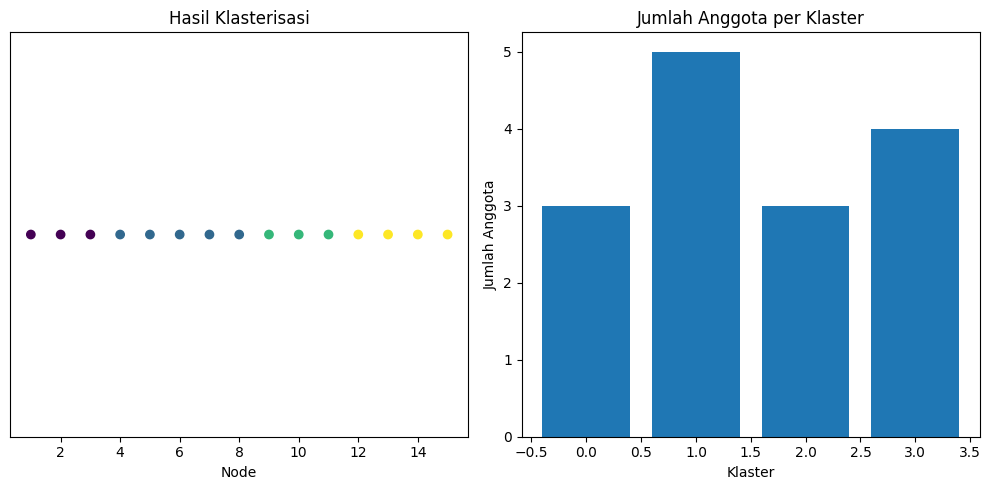

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def baca_dataset(nama_file):
    with open(nama_file, 'r') as file:
        lines = file.readlines()

    data = [list(map(lambda x: float(x) if x != 'inf' else np.inf, line.strip().split())) for line in lines]
    return np.array(data)

def make_symmetric(matrix):
    return (matrix + matrix.T) / 2

def asymmetric_affinity_propagation(dist_matrix):
    # Membuat matriks simetris
    sym_matrix = make_symmetric(dist_matrix)

    # Mengganti nilai tak terhingga dengan nilai maksimum yang bukan tak terhingga
    max_finite = np.max(sym_matrix[np.isfinite(sym_matrix)])
    sym_matrix[np.isinf(sym_matrix)] = max_finite

    # Mengisi diagonal matriks dengan nol
    np.fill_diagonal(sym_matrix, 0)

    # Mengubah matriks jarak menjadi matriks kemiripan
    similarity_matrix = -sym_matrix

    # Melakukan Affinity Propagation tanpa node 0
    clustering = AffinityPropagation(random_state=42, damping=0.9, max_iter=1000)
    labels = clustering.fit_predict(similarity_matrix[1:, 1:])

    return labels

def evaluate_clustering(dist_matrix, labels):
    # Mengganti nilai tak terhingga dengan nilai maksimum yang bukan tak terhingga
    max_finite = np.max(dist_matrix[np.isfinite(dist_matrix)])
    dist_matrix_copy = dist_matrix.copy()
    dist_matrix_copy[np.isinf(dist_matrix_copy)] = max_finite

    # Mengisi diagonal matriks dengan nol
    np.fill_diagonal(dist_matrix_copy, 0)

    return silhouette_score(dist_matrix_copy[1:, 1:], labels, metric='precomputed')

def main():
    # Membaca dataset
    dataset = baca_dataset("/content/NEW Dataset.txt")
    print(f"Ukuran dataset: {dataset.shape}")
    print(f"Nilai minimum: {np.min(dataset[np.isfinite(dataset)])}, Nilai maksimum: {np.max(dataset[np.isfinite(dataset)])}")

    # Melakukan klasterisasi dengan Affinity Propagation
    labels = asymmetric_affinity_propagation(dataset)

    # Menghitung skor Silhouette
    score = evaluate_clustering(dataset, labels)

    # Menampilkan hasil
    n_clusters = len(np.unique(labels))
    print(f"Jumlah klaster: {n_clusters}")
    print(f"Skor Silhouette: {score:.4f}")

    for i in range(n_clusters):
        nodes_in_cluster = np.where(labels == i)[0] + 1  # Menambahkan 1 untuk menyesuaikan indeks
        print(f"Klaster {i+1}: {nodes_in_cluster.tolist()}")

    # Visualisasi hasil klasterisasi
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(range(1, len(labels)+1), [0]*len(labels), c=labels, cmap='viridis')
    plt.title('Hasil Klasterisasi')
    plt.xlabel('Node')
    plt.yticks([])

    plt.subplot(122)
    unique_labels, counts = np.unique(labels, return_counts=True)
    plt.bar(unique_labels, counts)
    plt.title('Jumlah Anggota per Klaster')
    plt.xlabel('Klaster')
    plt.ylabel('Jumlah Anggota')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


# Optimization Algorithm

## Using Clustered Data

### Genetic Algorithm

In [ ]:
import numpy as np
import random
import time

class GeneticAlgorithm:
    def __init__(self, distance_matrix, population_size, mutation_rate, generations):
        self.distance_matrix = distance_matrix
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = self.initialize_population()
        self.best_distance = float('inf')
        self.best_route = None

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = list(range(1, len(self.distance_matrix)))
            random.shuffle(chromosome)
            chromosome = [0] + chromosome + [0]
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome):
        total_distance = 0
        for i in range(len(chromosome) - 1):
            total_distance += self.distance_matrix[chromosome[i]][chromosome[i + 1]]
        return 1 / total_distance

    def select_parents(self):
        tournament_size = 5
        tournament = random.sample(self.population, tournament_size)
        return max(tournament, key=self.calculate_fitness)

    def crossover(self, parent1, parent2):
        start, end = sorted(random.sample(range(1, len(parent1) - 1), 2))
        child = [None] * len(parent1)
        child[0] = 0
        child[-1] = 0
        child[start:end] = parent1[start:end]

        pointer = end
        for gene in parent2[1:-1]:
            if gene not in child:
                if pointer == len(child) - 1:
                    pointer = 1
                child[pointer] = gene
                pointer += 1

        return child

    def mutate(self, chromosome):
        for i in range(1, len(chromosome) - 1):
            if random.random() < self.mutation_rate:
                j = random.randint(1, len(chromosome) - 2)
                chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

    def evolve(self):
        new_population = []
        for _ in range(self.population_size):
            parent1 = self.select_parents()
            parent2 = self.select_parents()
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)
        self.population = new_population

    def run(self):
        start_time = time.time()
        for _ in range(self.generations):
            self.evolve()
            best_chromosome = max(self.population, key=self.calculate_fitness)
            best_distance = 1 / self.calculate_fitness(best_chromosome)
            if best_distance < self.best_distance:
                self.best_distance = best_distance
                self.best_route = best_chromosome
        end_time = time.time()
        runtime = end_time - start_time
        return self.best_route, self.best_distance, runtime

def run_ga_with_params(distance_matrix, clusters, population_size=50, mutation_rate=0.05, generations=100):
    total_shortest_distance = 0
    total_runtime = 0

    for i, cluster in enumerate(clusters):
        selected_distance_matrix = distance_matrix[np.ix_(cluster, cluster)]

        ga_solver = GeneticAlgorithm(selected_distance_matrix,
                                     population_size,
                                     mutation_rate,
                                     generations)

        best_route, best_distance, runtime = ga_solver.run()

        final_route = [cluster[index] for index in best_route]

        print(f"Cluster {i + 1}:")
        print("Route:", final_route)
        print("Shortest distance:", best_distance)
        print(f"Runtime GA with {generations} generations:", runtime, "seconds")
        print()

        total_shortest_distance += best_distance
        total_runtime += runtime

    print("Total Shortest Distance for all clusters:", total_shortest_distance)
    print(f"Total Runtime GA with {generations} generations:", total_runtime, "seconds")
    print("=" * 100)

def main():
    distance_matrix = np.loadtxt("NEW_Dataset.txt")

    clusters = [
        [0, 1, 2, 3],
        [0, 4, 5, 6, 7, 8],
        [0, 9, 10, 11],
        [0, 12, 13, 14, 15],
    ]

    # Running GA with default parameters
    print("Running GA with default parameters (population_size=50, mutation_rate=0.05, generations=100):")
    run_ga_with_params(distance_matrix, clusters)

    # Running GA with custom parameters 1
    print("\nRunning GA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):")
    run_ga_with_params(distance_matrix, clusters, population_size=75, mutation_rate=0.03, generations=150)

    # Running GA with custom parameters 2
    print("\nRunning GA with custom parameters 2 (population_size=40, mutation_rate=0.07, generations=200):")
    run_ga_with_params(distance_matrix, clusters, population_size=40, mutation_rate=0.07, generations=200)

if __name__ == '__main__':
    main()

Running GA with default parameters (population_size=50, mutation_rate=0.05, generations=100):
Cluster 1:
Route: [0, 2, 1, 3, 0]
Shortest distance: 31.5
Runtime GA with 100 generations: 0.5774681568145752 seconds

Cluster 2:
Route: [0, 8, 5, 4, 7, 6, 0]
Shortest distance: 19.400000000000002
Runtime GA with 100 generations: 0.8013136386871338 seconds

Cluster 3:
Route: [0, 11, 10, 9, 0]
Shortest distance: 37.8
Runtime GA with 100 generations: 0.6706490516662598 seconds

Cluster 4:
Route: [0, 15, 14, 13, 12, 0]
Shortest distance: 27.300000000000004
Runtime GA with 100 generations: 0.6958599090576172 seconds

Total Shortest Distance for all clusters: 116.0
Total Runtime GA with 100 generations: 2.745290756225586 seconds

Running GA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):
Cluster 1:
Route: [0, 2, 1, 3, 0]
Shortest distance: 31.5
Runtime GA with 150 generations: 1.379443645477295 seconds

Cluster 2:
Route: [0, 8, 5, 4, 7, 6, 0]
Shortest distance: 1

### Modified GA

In [ ]:
import numpy as np
import random
import time

class EnhancedGeneticAlgorithm:
    def __init__(self, distance_matrix, population_size, initial_mutation_rate, generations):
        self.distance_matrix = distance_matrix
        self.population_size = population_size
        self.mutation_rate = initial_mutation_rate
        self.generations = generations
        self.population = self.initialize_population()
        self.best_distance = float('inf')
        self.best_route = None

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = list(range(1, len(self.distance_matrix)))
            random.shuffle(chromosome)
            chromosome = [0] + chromosome + [0]
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome):
        total_distance = 0
        for i in range(len(chromosome) - 1):
            total_distance += self.distance_matrix[chromosome[i]][chromosome[i + 1]]
        return 1 / total_distance

    def select_parents(self):
        tournament_size = 5
        tournament = random.sample(self.population, tournament_size)
        return max(tournament, key=self.calculate_fitness)

    def edge_recombination_crossover(self, parent1, parent2):
        size = len(parent1)
        edge_map = {i: set() for i in range(size)}

        for parent in [parent1, parent2]:
            for i in range(size):
                edge_map[parent[i]].add(parent[(i-1) % size])
                edge_map[parent[i]].add(parent[(i+1) % size])

        current = random.choice([parent1[1], parent2[1]])  # Start with a random city (excluding depot)
        child = [0, current]

        while len(child) < size - 1:
            if edge_map[current]:
                next_node = min(edge_map[current], key=lambda x: len(edge_map[x]))
            else:
                unvisited = set(range(1, size-1)) - set(child)
                next_node = random.choice(list(unvisited))

            child.append(next_node)
            current = next_node

            for node in edge_map:
                if current in edge_map[node]:
                    edge_map[node].remove(current)

        child.append(0)  # Add depot at the end
        return child

    def two_opt(self, route):
        improved = True
        while improved:
            improved = False
            for i in range(1, len(route) - 2):
                for j in range(i + 1, len(route) - 1):
                    if j - i == 1: continue
                    new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
                    if self.calculate_fitness(new_route) > self.calculate_fitness(route):
                        route = new_route
                        improved = True
            if improved:
                break  # Stop after first improvement to save time
        return route

    def mutate(self, chromosome):
        for i in range(1, len(chromosome) - 1):
            if random.random() < self.mutation_rate:
                j = random.randint(1, len(chromosome) - 2)
                chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

    def evolve(self):
        new_population = []
        elite_size = int(0.1 * self.population_size)
        sorted_population = sorted(self.population, key=self.calculate_fitness, reverse=True)
        new_population.extend(sorted_population[:elite_size])

        while len(new_population) < self.population_size:
            parent1 = self.select_parents()
            parent2 = self.select_parents()
            child = self.edge_recombination_crossover(parent1, parent2)
            child = self.two_opt(child)
            self.mutate(child)
            new_population.append(child)

        self.population = new_population

        # Adaptive mutation rate
        best_fitness = self.calculate_fitness(max(self.population, key=self.calculate_fitness))
        avg_fitness = sum(self.calculate_fitness(ind) for ind in self.population) / self.population_size
        self.mutation_rate = 0.5 * (1 - (best_fitness - avg_fitness) / best_fitness)

    def run(self):
        start_time = time.time()
        for _ in range(self.generations):
            self.evolve()
            best_chromosome = max(self.population, key=self.calculate_fitness)
            best_distance = 1 / self.calculate_fitness(best_chromosome)
            if best_distance < self.best_distance:
                self.best_distance = best_distance
                self.best_route = best_chromosome
        end_time = time.time()
        runtime = end_time - start_time
        return self.best_route, self.best_distance, runtime

def run_ga_with_params(distance_matrix, clusters, population_size=50, mutation_rate=0.05, generations=100):
    total_shortest_distance = 0
    total_runtime = 0

    for i, cluster in enumerate(clusters):
        selected_distance_matrix = distance_matrix[np.ix_(cluster, cluster)]

        ga_solver = EnhancedGeneticAlgorithm(selected_distance_matrix,
                                             population_size,
                                             mutation_rate,
                                             generations)

        best_route, best_distance, runtime = ga_solver.run()

        # Ensure all nodes are included
        final_route = [0]  # Start with depot
        remaining_nodes = set(range(1, len(cluster)))
        for index in best_route[1:-1]:  # Exclude first and last (depot)
            if index in remaining_nodes:
                final_route.append(cluster[index])
                remaining_nodes.remove(index)

        # Add any remaining nodes
        final_route.extend([cluster[node] for node in remaining_nodes])
        final_route.append(0)  # End with depot

        print(f"Cluster {i + 1}:")
        print("Route:", final_route)
        print("Shortest distance:", best_distance)
        print(f"Runtime Enhanced GA with {generations} generations:", runtime, "seconds")
        print()

        total_shortest_distance += best_distance
        total_runtime += runtime

    print("Total Shortest Distance for all clusters:", total_shortest_distance)
    print(f"Total Runtime Enhanced GA with {generations} generations:", total_runtime, "seconds")
    print("=" * 100)

def main():
    distance_matrix = np.loadtxt("NEW_Dataset.txt")

    clusters = [
        [0, 1, 2, 3],
        [0, 4, 5, 6, 7, 8],
        [0, 9, 10, 11],
        [0, 12, 13, 14, 15],
    ]

    # Running GA with default parameters
    print("Running GA with default parameters (population_size=50, mutation_rate=0.05, generations=100):")
    run_ga_with_params(distance_matrix, clusters)

    # Running GA with custom parameters 1
    print("\nRunning GA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):")
    run_ga_with_params(distance_matrix, clusters, population_size=75, mutation_rate=0.03, generations=150)

    # Running GA with custom parameters 2
    print("\nRunning GA with custom parameters 2 (population_size=40, mutation_rate=0.07, generations=200):")
    run_ga_with_params(distance_matrix, clusters, population_size=40, mutation_rate=0.07, generations=200)

if __name__ == '__main__':
    main()

Running GA with default parameters (population_size=50, mutation_rate=0.05, generations=100):
Cluster 1:
Route: [0, 2, 1, 3, 0]
Shortest distance: 31.5
Runtime Enhanced GA with 100 generations: 0.5677480697631836 seconds

Cluster 2:
Route: [0, 8, 5, 6, 7, 4, 0]
Shortest distance: 13.899999999999999
Runtime Enhanced GA with 100 generations: 1.106767177581787 seconds

Cluster 3:
Route: [0, 9, 10, 11, 0]
Shortest distance: 34.9
Runtime Enhanced GA with 100 generations: 0.5258052349090576 seconds

Cluster 4:
Route: [0, 13, 14, 12, 15, 0]
Shortest distance: 27.0
Runtime Enhanced GA with 100 generations: 0.7366023063659668 seconds

Total Shortest Distance for all clusters: 107.3
Total Runtime Enhanced GA with 100 generations: 2.936922788619995 seconds

Running GA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):
Cluster 1:
Route: [0, 2, 1, 3, 0]
Shortest distance: 31.5
Runtime Enhanced GA with 150 generations: 1.5127735137939453 seconds

Cluster 2:
Route: [0

## Without Clustering

### Genetic Algorithm

In [ ]:
import numpy as np
import random
import time

class GeneticAlgorithm:
    def __init__(self, distance_matrix, population_size, mutation_rate, generations):
        self.distance_matrix = distance_matrix
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = self.initialize_population()
        self.best_distance = float('inf')
        self.best_route = None

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = list(range(1, len(self.distance_matrix)))
            random.shuffle(chromosome)
            chromosome = [0] + chromosome + [0]
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome):
        total_distance = 0
        for i in range(len(chromosome) - 1):
            total_distance += self.distance_matrix[chromosome[i]][chromosome[i + 1]]
        return 1 / total_distance

    def select_parents(self):
        tournament_size = 5
        tournament = random.sample(self.population, tournament_size)
        return max(tournament, key=self.calculate_fitness)

    def crossover(self, parent1, parent2):
        start, end = sorted(random.sample(range(1, len(parent1) - 1), 2))
        child = [None] * len(parent1)
        child[0] = 0
        child[-1] = 0
        child[start:end] = parent1[start:end]

        pointer = end
        for gene in parent2[1:-1]:
            if gene not in child:
                if pointer == len(child) - 1:
                    pointer = 1
                child[pointer] = gene
                pointer += 1

        return child

    def mutate(self, chromosome):
        for i in range(1, len(chromosome) - 1):
            if random.random() < self.mutation_rate:
                j = random.randint(1, len(chromosome) - 2)
                chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

    def evolve(self):
        new_population = []
        for _ in range(self.population_size):
            parent1 = self.select_parents()
            parent2 = self.select_parents()
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)
        self.population = new_population

    def run(self):
        start_time = time.time()
        for _ in range(self.generations):
            self.evolve()
            best_chromosome = max(self.population, key=self.calculate_fitness)
            best_distance = 1 / self.calculate_fitness(best_chromosome)
            if best_distance < self.best_distance:
                self.best_distance = best_distance
                self.best_route = best_chromosome
        end_time = time.time()
        runtime = end_time - start_time
        return self.best_route, self.best_distance, runtime

def run_ga_with_params(distance_matrix, population_size=50, mutation_rate=0.05, generations=100):
    ga_solver = GeneticAlgorithm(distance_matrix,
                                 population_size,
                                 mutation_rate,
                                 generations)

    best_route, best_distance, runtime = ga_solver.run()

    print("Best Route:", best_route)
    print("Shortest distance:", best_distance)
    print(f"Runtime GA with {generations} generations:", runtime, "seconds")
    print("=" * 100)

def main():
    distance_matrix = np.loadtxt("NEW_Dataset.txt")

    # Running GA with default parameters
    print("Running GA with default parameters (population_size=50, mutation_rate=0.05, generations=100):")
    run_ga_with_params(distance_matrix)

    # Running GA with custom parameters 1
    print("\nRunning GA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):")
    run_ga_with_params(distance_matrix, population_size=75, mutation_rate=0.03, generations=150)

    # Running GA with custom parameters 2
    print("\nRunning GA with custom parameters 2 (population_size=40, mutation_rate=0.07, generations=200):")
    run_ga_with_params(distance_matrix, population_size=40, mutation_rate=0.07, generations=200)

if __name__ == '__main__':
    main()

Running GA with default parameters (population_size=50, mutation_rate=0.05, generations=100):
Best Route: [0, 5, 7, 9, 10, 11, 13, 3, 2, 1, 15, 14, 12, 4, 6, 8, 0]
Shortest distance: 89.49999999999999
Runtime GA with 100 generations: 0.8043696880340576 seconds

Running GA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):
Best Route: [0, 4, 3, 1, 2, 15, 14, 13, 11, 10, 9, 12, 8, 5, 6, 7, 0]
Shortest distance: 83.39999999999999
Runtime GA with 150 generations: 1.0965628623962402 seconds

Running GA with custom parameters 2 (population_size=40, mutation_rate=0.07, generations=200):
Best Route: [0, 4, 5, 6, 9, 11, 10, 15, 14, 13, 12, 2, 1, 3, 7, 8, 0]
Shortest distance: 90.40000000000002
Runtime GA with 200 generations: 0.759315013885498 seconds


#### Visualized Map of GA

In [ ]:
import folium
import pandas as pd
import requests
from IPython.display import display, HTML

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on GA outputs
routes = {
    'Default Parameters': [0, 5, 7, 9, 10, 11, 13, 3, 2, 1, 15, 14, 12, 4, 6, 8],
    'Custom Parameters 1': [0, 4, 3, 1, 2, 15, 14, 13, 11, 10, 9 ,12 ,8 ,5 ,6 ,7],
    'Custom Parameters 2': [0 ,4 ,5 ,6 ,9 ,11 ,10 ,15 ,14 ,13 ,12 ,2 ,1 ,3]
}

# Function to get route between two points using OSRM
def get_route(start_idx: int , end_idx: int):
    start = spbu_df.iloc[start_idx][['Lat', 'Long']]
    end = spbu_df.iloc[end_idx][['Lat', 'Long']]

    url = f"http://router.project-osrm.org/route/v1/driving/{start['Long']},{start['Lat']};{end['Long']},{end['Lat']}?overview=full&geometries=geojson"
    response = requests.get(url)

    if response.status_code ==200:
        route = response.json()['routes'][0]['geometry']['coordinates']
        return [(coord[1], coord[0]) for coord in route]
    else:
        return None

# Create maps for each route
for param_set_name in routes.keys():
    # Create a map centered around Surabaya
    map_center = [-7.27 ,112.73] # Approximate center of Surabaya
    m = folium.Map(location=map_center , zoom_start=12)

    # Add SPBUs to the map with visit order numbers
    route = routes[param_set_name]

    for visit_order in range(len(route)):
        idx = route[visit_order]
        folium.Marker(
            location=[spbu_df.iloc[idx]['Lat'], spbu_df.iloc[idx]['Long']],
            popup=f"{spbu_df.iloc[idx]['SPBU Shell']} (Visit {visit_order})",
            icon=folium.Icon(color='blue')
        ).add_to(m)

    # Add the route to the map
    for i in range(len(route) -1):
        start_idx = route[i]
        end_idx = route[i +1]

        route_coords = get_route(start_idx , end_idx)

        if route_coords:
            folium.PolyLine(locations=route_coords , color='red' , weight=3 , opacity=0.8).add_to(m)

    # Save the map to an HTML file
    m.save(f'{param_set_name.replace(" ", "_").lower()}_route_map.html')

    # Display the map inline (if running in Jupyter Notebook)
    display(m)

# Display message indicating completion
print("Maps have been saved successfully.")

Maps have been saved successfully.


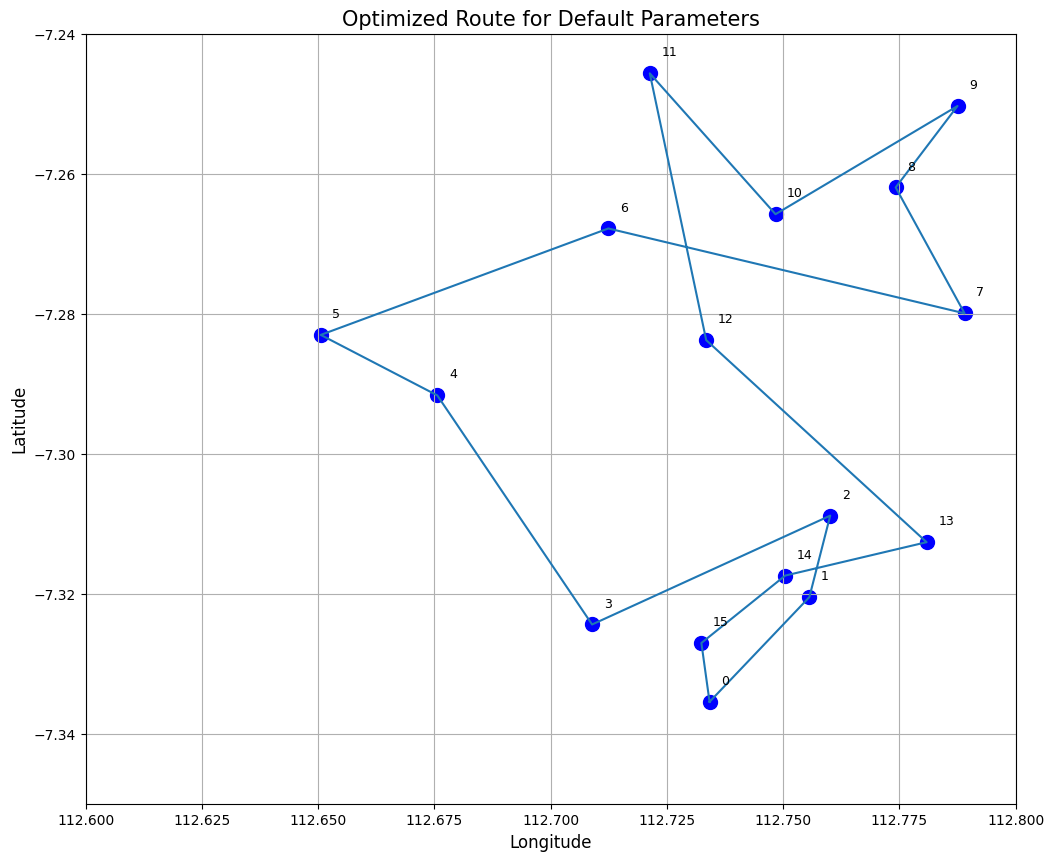

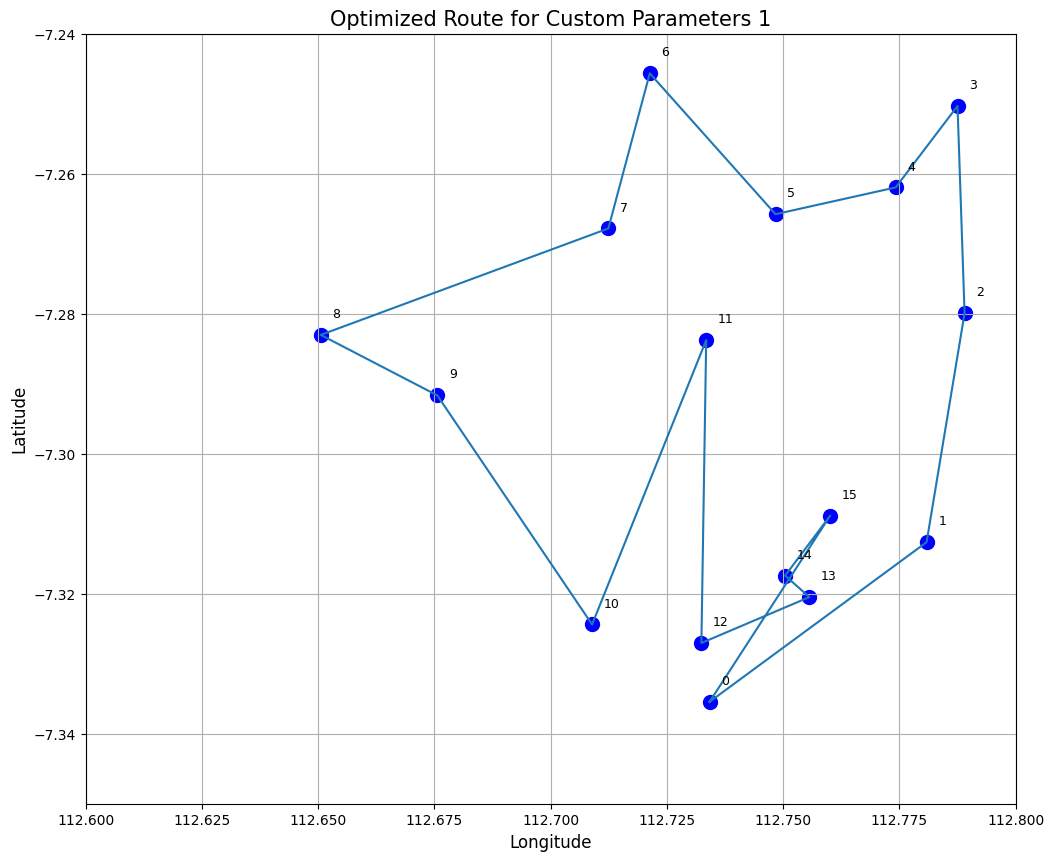

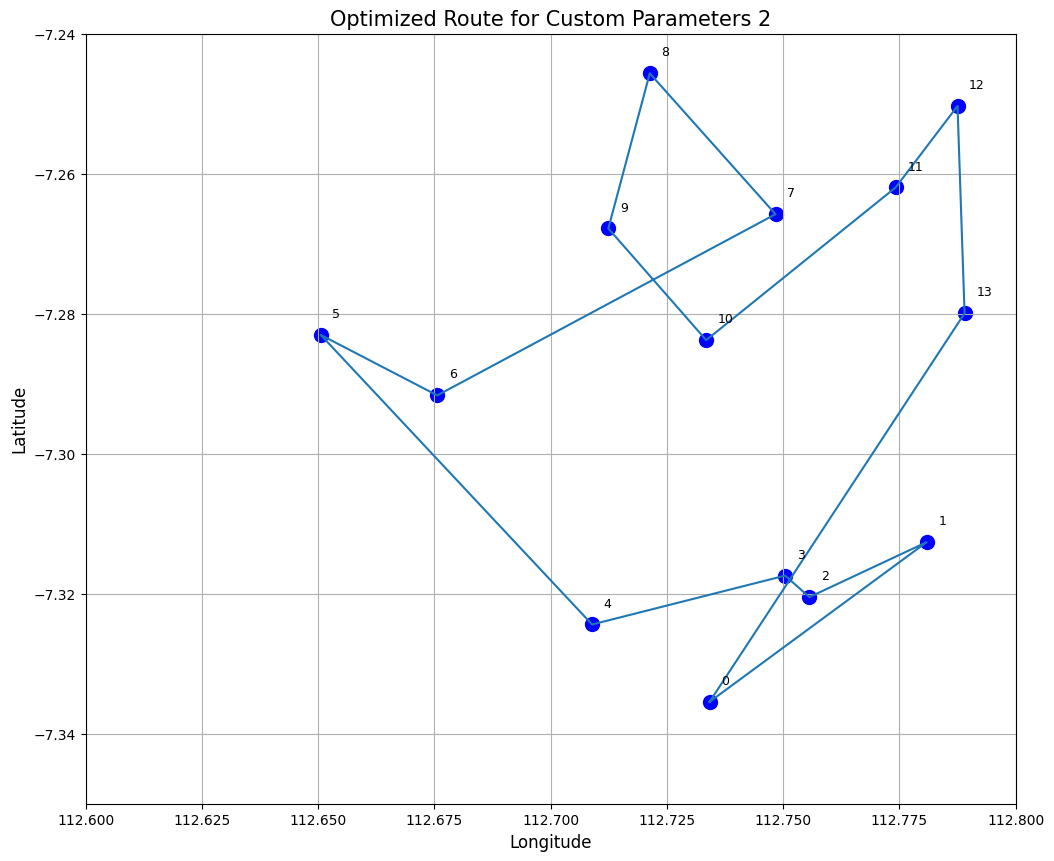

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on GA outputs
routes = {
    'Default Parameters': [0 ,5 ,7 ,9 ,10 ,11 ,13 ,3 ,2 ,1 ,15 ,14 ,12 ,4 ,6 ,8],
    'Custom Parameters 1': [0 ,4 ,3 ,1 ,2 ,15 ,14 ,13 ,11 ,10 ,9 ,12 ,8 ,5 ,6 ,7],
    'Custom Parameters 2': [0 ,4 ,5 ,6 ,9 ,11 ,10 ,15 ,14 ,13 ,12 ,2 ,1 ,3]
}

# Create separate plots for each route
for route_name in routes.keys():
    plt.figure(figsize=(12,10))
    plt.title(f"Optimized Route for {route_name}", fontsize=15)
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.xlim(112.6, 112.8)   # Define x-axis limits
    plt.ylim(-7.35,-7.24)    # Define y-axis limits
    plt.grid(True)

    # Get the route for the current parameter set
    route = routes[route_name]

    # Plot SPBUs with visit order numbers and routes
    for visit_order in range(len(route)):
        idx = route[visit_order]

        # Plot each SPBU location
        plt.scatter(spbu_df["Long"][idx], spbu_df["Lat"][idx], color='blue', s=100)

        # Add visit order label
        plt.text(spbu_df["Long"][idx] + 0.0025,
                 spbu_df["Lat"][idx] + 0.0025,
                 f"{visit_order}",
                 fontsize=9)

    # Add routes to the plot
    route_coords = [(spbu_df.iloc[i]['Long'], spbu_df.iloc[i]['Lat']) for i in route]
    route_x = [coord[0] for coord in route_coords]
    route_y = [coord[1] for coord in route_coords]

    # Connect points with a line to form the route
    plt.plot(route_x + [route_x[0]], route_y + [route_y[0]], label=route_name)

    # Show the plot for this specific route
    plt.show()

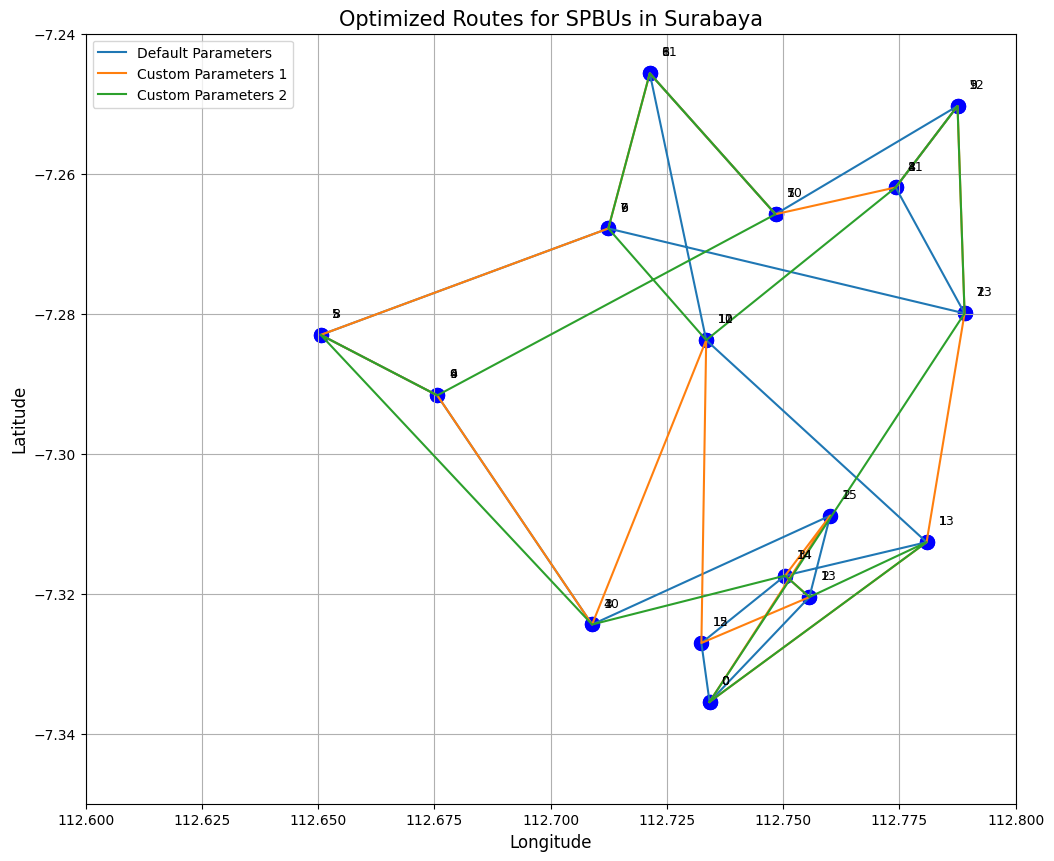

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on GA outputs
routes = {
    'Default Parameters': [0, 5, 7, 9, 10, 11, 13, 3, 2, 1, 15, 14, 12, 4, 6, 8],
    'Custom Parameters 1': [0 ,4 ,3 ,1 ,2 ,15 ,14 ,13 ,11 ,10 ,9 ,12 ,8 ,5 ,6 ,7],
    'Custom Parameters 2': [0 ,4 ,5 ,6 ,9 ,11 ,10 ,15 ,14 ,13 ,12 ,2 ,1 ,3]
}

# Create a white background plot
plt.figure(figsize=(12, 10))
plt.title("Optimized Routes for SPBUs in Surabaya", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.xlim(112.6, 112.8)   # Define x-axis limits
plt.ylim(-7.35,-7.24)    # Define y-axis limits
plt.grid(True)

# Plot SPBUs with visit order numbers and routes
for route_name, route in routes.items():
    for visit_order in range(len(route)):
        idx = route[visit_order]

        # Plot each SPBU location
        plt.scatter(spbu_df["Long"][idx], spbu_df["Lat"][idx], color='blue', s=100)

        # Add visit order label
        plt.text(spbu_df["Long"][idx] + 0.0025,
                 spbu_df["Lat"][idx] + 0.0025,
                 f"{visit_order}",
                 fontsize=9)

    # Add routes to the plot
    route_coords = [(spbu_df.iloc[i]['Long'], spbu_df.iloc[i]['Lat']) for i in route]
    route_x = [coord[0] for coord in route_coords]
    route_y = [coord[1] for coord in route_coords]

    # Connect points with a line
    plt.plot(route_x + [route_x[0]], route_y + [route_y[0]], label=route_name)

# Add a legend
plt.legend()

# Show the plot
plt.show()

### EGA (Modified GA)

In [ ]:
import numpy as np
import random
import time

class ExtendedGeneticAlgorithm:
    def __init__(self, distance_matrix, population_size, mutation_rate, generations):
        self.distance_matrix = distance_matrix
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.generations = generations
        self.population = self.initialize_population()
        self.best_distance = float('inf')
        self.best_route = None

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            # Create a route that starts and ends with 0
            chromosome = list(range(1, len(self.distance_matrix)))  # Nodes 1 to n-1
            random.shuffle(chromosome)
            chromosome = [0] + chromosome + [0]  # Add depot at start and end
            population.append(chromosome)
        return population

    def calculate_fitness(self, chromosome):
        total_distance = 0
        for i in range(len(chromosome) - 1):
            total_distance += self.distance_matrix[chromosome[i]][chromosome[i + 1]]
        return 1 / total_distance if total_distance > 0 else float('inf')

    def select_parents(self):
        tournament_size = 5
        tournament = random.sample(self.population, tournament_size)
        return max(tournament, key=self.calculate_fitness)

    def crossover(self, parent1, parent2):
        start, end = sorted(random.sample(range(1, len(parent1) - 1), 2))  # Exclude depot nodes
        child = [None] * len(parent1)
        child[0] = 0  # Start with depot
        child[-1] = 0  # End with depot
        child[start:end] = parent1[start:end]

        # Fill in the rest from parent2
        pointer = end
        for gene in parent2[1:-1]:  # Exclude depot
            if gene not in child:
                if pointer == len(child) - 1:
                    pointer = 1
                child[pointer] = gene
                pointer += 1

        return child

    def mutate(self, chromosome):
        for i in range(1, len(chromosome) - 1):
            if random.random() < self.mutation_rate:
                j = random.randint(1, len(chromosome) - 2)
                chromosome[i], chromosome[j] = chromosome[j], chromosome[i]

    def evolve(self):
        new_population = []
        for _ in range(self.population_size):
            parent1 = self.select_parents()
            parent2 = self.select_parents()
            child = self.crossover(parent1, parent2)
            self.mutate(child)
            new_population.append(child)
        self.population = new_population

    def run(self):
        start_time = time.time()
        for _ in range(self.generations):
            self.evolve()
            best_chromosome = max(self.population, key=self.calculate_fitness)
            best_distance = 1 / self.calculate_fitness(best_chromosome)
            if best_distance < self.best_distance:
                self.best_distance = best_distance
                self.best_route = best_chromosome
        end_time = time.time()
        runtime = end_time - start_time
        return self.best_route, self.best_distance, runtime

def run_ega_with_params(distance_matrix, population_size=50, mutation_rate=0.05, generations=100):
    ega_solver = ExtendedGeneticAlgorithm(distance_matrix,
                                           population_size,
                                           mutation_rate,
                                           generations)

    best_route, best_distance, runtime = ega_solver.run()

    print("Best Route:", best_route)
    print("Shortest distance:", best_distance)
    print(f"Runtime EGA with {generations} generations:", runtime, "seconds")
    print("=" * 100)

def main():
    distance_matrix = np.loadtxt("/content/NEW Dataset.txt")

    # Running EGA with default parameters
    print("Running EGA with default parameters (population_size=50, mutation_rate=0.05, generations=100):")
    run_ega_with_params(distance_matrix)

    # Running EGA with custom parameters 1
    print("\nRunning EGA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):")
    run_ega_with_params(distance_matrix, population_size=75, mutation_rate=0.03, generations=150)

    # Running EGA with custom parameters 2
    print("\nRunning EGA with custom parameters 2 (population_size=40, mutation_rate=0.07, generations=200):")
    run_ega_with_params(distance_matrix, population_size=40, mutation_rate=0.07, generations=200)

if __name__ == '__main__':
    main()


Running EGA with default parameters (population_size=50, mutation_rate=0.05, generations=100):
Best Route: [0, 8, 5, 6, 12, 15, 14, 13, 11, 10, 9, 7, 4, 3, 1, 2, 0]
Shortest distance: 90.10000000000001
Runtime EGA with 100 generations: 0.4247572422027588 seconds

Running EGA with custom parameters 1 (population_size=75, mutation_rate=0.03, generations=150):
Best Route: [0, 8, 5, 6, 9, 10, 11, 13, 12, 14, 15, 2, 1, 3, 4, 7, 0]
Shortest distance: 77.4
Runtime EGA with 150 generations: 0.9341788291931152 seconds

Running EGA with custom parameters 2 (population_size=40, mutation_rate=0.07, generations=200):
Best Route: [0, 4, 7, 12, 15, 3, 1, 2, 14, 13, 10, 11, 9, 5, 6, 8, 0]
Shortest distance: 87.89999999999999
Runtime EGA with 200 generations: 0.6989905834197998 seconds


#### Visualized Map of EGA

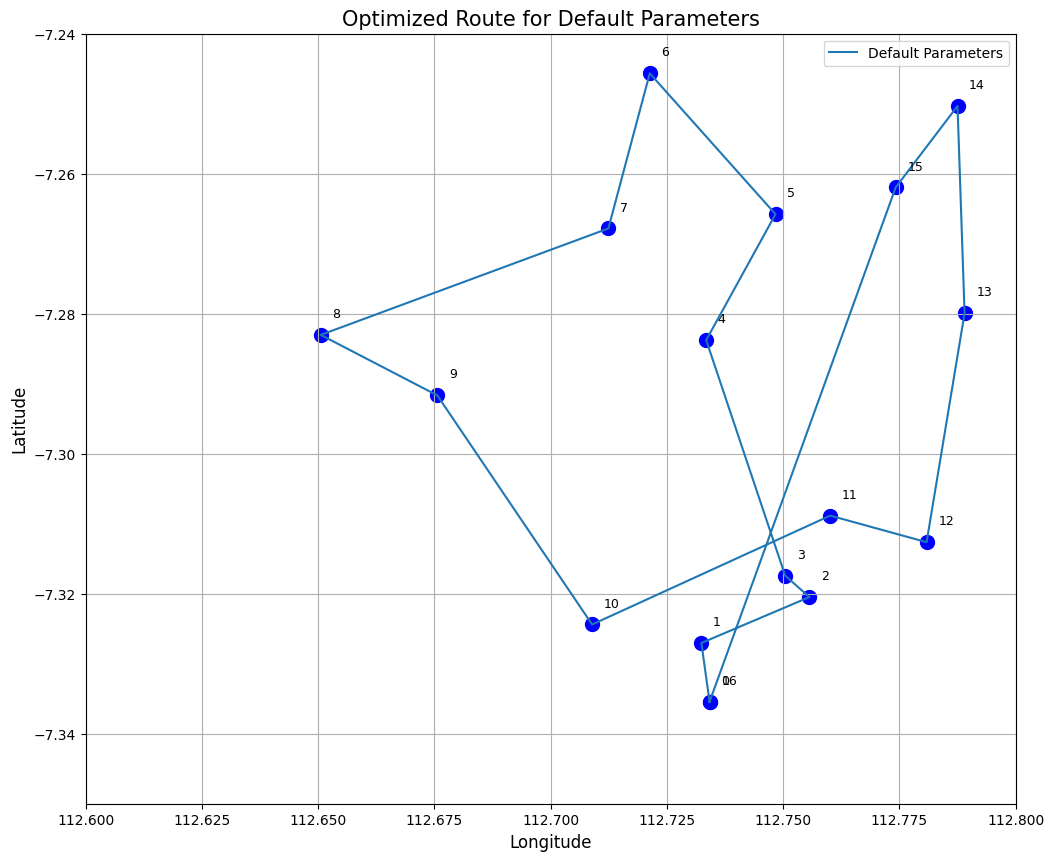

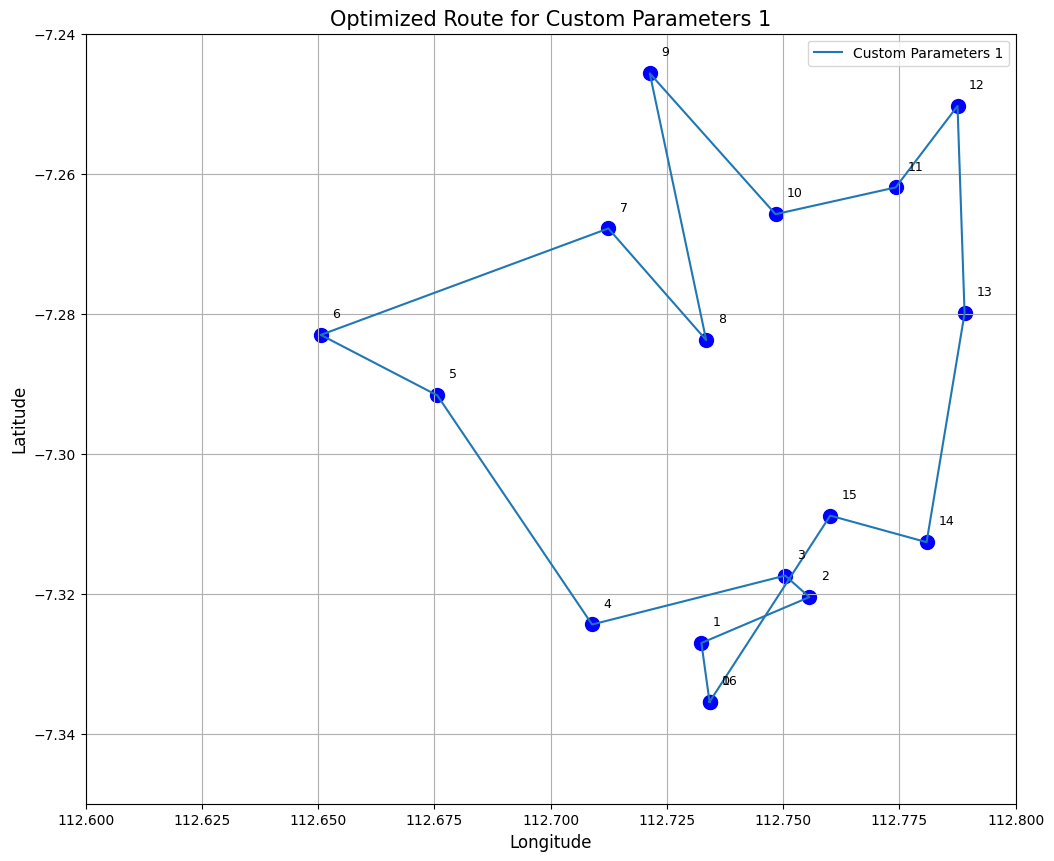

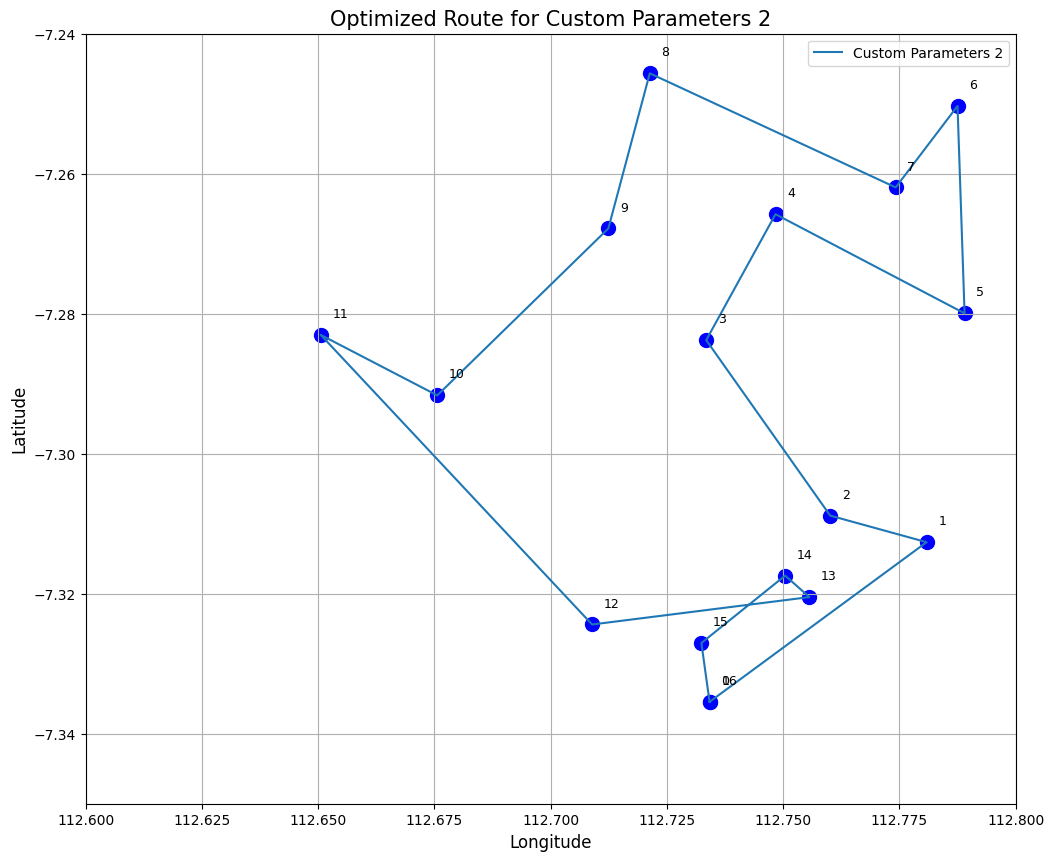

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on enhanced GA outputs
routes = {
    'Default Parameters': [0, 8, 5, 6, 12, 15, 14, 13, 11, 10, 9, 7, 4, 3, 1, 2, 0],
    'Custom Parameters 1': [0, 8, 5, 6, 9, 10, 11, 13, 12, 14, 15, 2, 1, 3, 4, 7, 0],
    'Custom Parameters 2': [0, 4, 7, 12, 15, 3, 1, 2, 14, 13, 10, 11, 9, 5, 6, 8, 0]
}

# Create separate plots for each route
for route_name in routes.keys():
    plt.figure(figsize=(12,10))
    plt.title(f"Optimized Route for {route_name}", fontsize=15)
    plt.xlabel("Longitude", fontsize=12)
    plt.ylabel("Latitude", fontsize=12)
    plt.xlim(112.6, 112.8)   # Define x-axis limits
    plt.ylim(-7.35,-7.24)    # Define y-axis limits
    plt.grid(True)

    # Get the route for the current parameter set
    route = routes[route_name]

    # Plot SPBUs with visit order numbers and routes
    for visit_order in range(len(route)):
        idx = route[visit_order]

        # Plot each SPBU location
        plt.scatter(spbu_df["Long"][idx], spbu_df["Lat"][idx], color='blue', s=100)

        # Add visit order label
        plt.text(spbu_df["Long"][idx] + 0.0025,
                 spbu_df["Lat"][idx] + 0.0025,
                 f"{visit_order}",
                 fontsize=9)

    # Add routes to the plot
    route_coords = [(spbu_df.iloc[i]['Long'], spbu_df.iloc[i]['Lat']) for i in route]
    route_x = [coord[0] for coord in route_coords]
    route_y = [coord[1] for coord in route_coords]

    # Connect points with a line to form the route
    plt.plot(route_x + [route_x[0]], route_y + [route_y[0]], label=route_name)

    # Show the plot for this specific route
    plt.legend()
    plt.show()

In [ ]:
import folium
import pandas as pd
import requests
from IPython.display import display

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on enhanced GA outputs
routes = {
    'Default Parameters': [0, 8, 5, 6, 12, 15, 14, 13, 11, 10, 9, 7, 4, 3, 1, 2, 0],
    'Custom Parameters 1': [0, 8, 5, 6, 9, 10, 11, 13, 12, 14, 15, 2, 1, 3, 4, 7, 0],
    'Custom Parameters 2': [0, 4, 7, 12, 15, 3, 1, 2, 14, 13, 10, 11, 9, 5, 6, 8, 0]
}

# Function to get route between two points using OSRM
def get_route(start_idx: int , end_idx: int):
    start = spbu_df.iloc[start_idx][['Lat', 'Long']]
    end = spbu_df.iloc[end_idx][['Lat', 'Long']]

    url = f"http://router.project-osrm.org/route/v1/driving/{start['Long']},{start['Lat']};{end['Long']},{end['Lat']}?overview=full&geometries=geojson"
    response = requests.get(url)

    if response.status_code ==200:
        route = response.json()['routes'][0]['geometry']['coordinates']
        return [(coord[1], coord[0]) for coord in route]
    else:
        return None

# Create maps for each route
for param_set_name in routes.keys():
    # Create a map centered around Surabaya
    map_center = [-7.27 ,112.73] # Approximate center of Surabaya
    m = folium.Map(location=map_center , zoom_start=12)

    # Add SPBUs to the map with visit order numbers
    route = routes[param_set_name]

    for visit_order in range(len(route)):
        idx = route[visit_order]
        folium.Marker(
            location=[spbu_df.iloc[idx]['Lat'], spbu_df.iloc[idx]['Long']],
            popup=f"{spbu_df.iloc[idx]['SPBU Shell']} (Visit {visit_order})",
            icon=folium.Icon(color='blue')
        ).add_to(m)

    # Add the route to the map
    for i in range(len(route) -1):
        start_idx = route[i]
        end_idx = route[i +1]

        route_coords = get_route(start_idx , end_idx)

        if route_coords:
            folium.PolyLine(locations=route_coords , color='red' , weight=3 , opacity=0.8).add_to(m)

    # Save the map to an HTML file
    m.save(f'{param_set_name.replace(" ", "_").lower()}_enhanced_route_map.html')

    # Display the map inline (if running in Jupyter Notebook)
    display(m)

# Display message indicating completion
print("Maps have been saved successfully.")

Maps have been saved successfully.


# Routes Visualization


In [ ]:
pip install matplotlib folium pandas

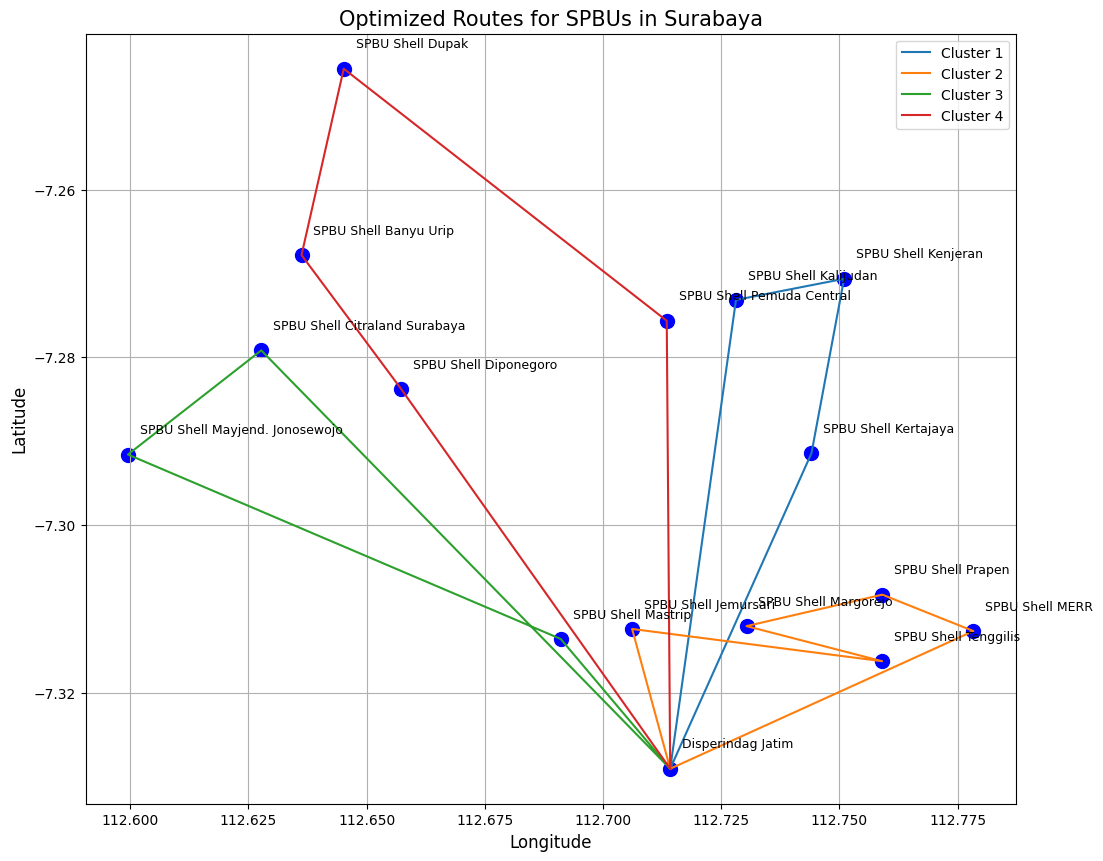

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3290371, -7.2706385, -7.2731581, -7.2914352,
        -7.3126265, -7.3162203, -7.3120378, -7.3082884,
        -7.3123783, -7.3135701, -7.2915856, -7.279171,
        -7.2837743, -7.2678106, -7.2455989, -7.2756419
    ],
    "Long": [
        112.7142206, 112.7509975, 112.7281368, 112.7441023,
        112.7783546, 112.7590378, 112.7303694, 112.7590938,
        112.7061651, 112.6910589, 112.59951, 112.6277138,
        112.6573062, 112.6362348, 112.6451612, 112.7134918
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on clusters
routes = {
    'Cluster 1': [0, 2, 1, 3, 0],
    'Cluster 2': [0, 8, 5, 6, 7, 4, 0],
    'Cluster 3': [0, 9, 10, 11, 0],
    'Cluster 4': [0, 15, 14, 13, 12, 0]
}

# Create a white background plot
plt.figure(figsize=(12, 10))
plt.title("Optimized Routes for SPBUs in Surabaya", fontsize=15)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True)

# Plot SPBUs
for idx in range(len(spbu_df)):
    plt.scatter(spbu_df["Long"][idx], spbu_df["Lat"][idx], color='blue', s=100)
    plt.text(spbu_df["Long"][idx] + 0.0025,
             spbu_df["Lat"][idx] + 0.0025,
             spbu_df["SPBU Shell"][idx],
             fontsize=9)

# Add routes to the plot
for cluster_name, route in routes.items():
    route_coords = [(spbu_df.iloc[i]['Long'], spbu_df.iloc[i]['Lat']) for i in route]
    route_x = [coord[0] for coord in route_coords]
    route_y = [coord[1] for coord in route_coords]

    # Connect points with a line and close the loop
    plt.plot(route_x + [route_x[0]], route_y + [route_y[0]], label=cluster_name)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Map saved as PNG: optimized_routes_map.png


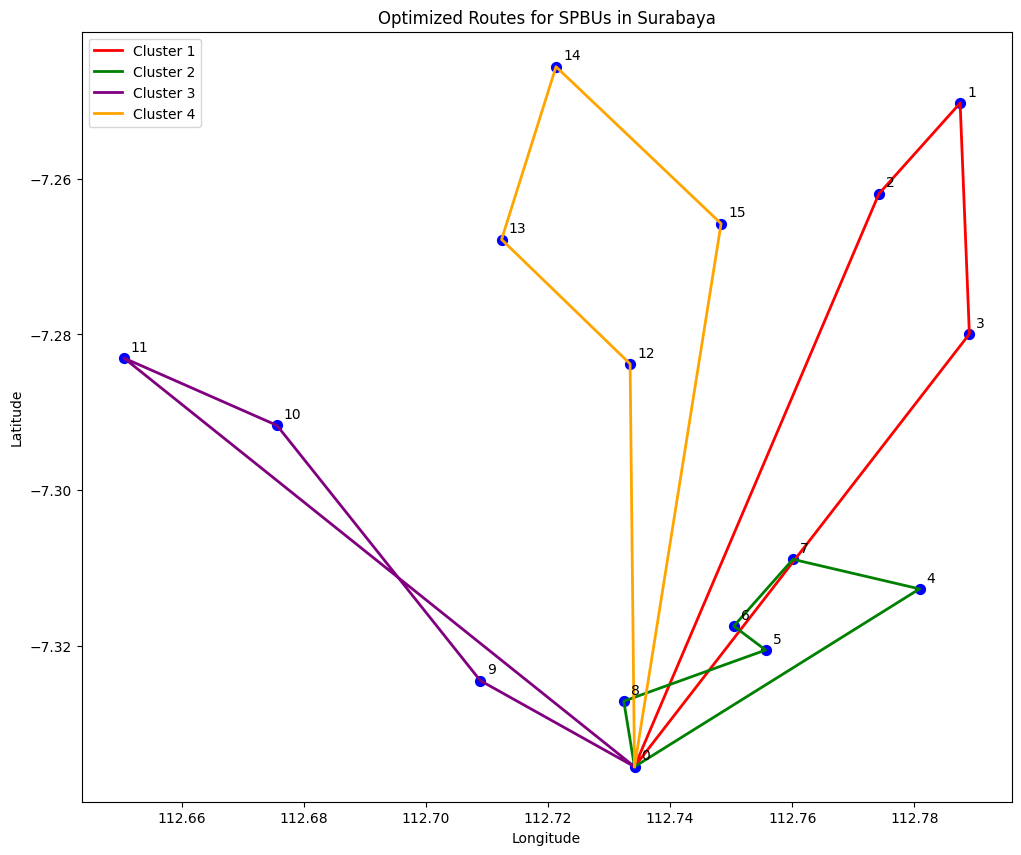

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Define routes based on clusters
routes = {
    'Cluster 1': [0, 2, 1, 3, 0],
    'Cluster 2': [0, 8, 5, 6, 7, 4, 0],
    'Cluster 3': [0, 9, 10, 11, 0],
    'Cluster 4': [0, 15, 14, 13, 12, 0]
}

# Create a plot
plt.figure(figsize=(12, 10))

# Plot all SPBUs
plt.scatter(spbu_df['Long'], spbu_df['Lat'], c='blue', s=50)

# Add labels for each SPBU
for i, row in spbu_df.iterrows():
    plt.annotate(row['No.'], (row['Long'], row['Lat']), xytext=(5, 5), textcoords='offset points')

# Plot routes
colors = ['red', 'green', 'purple', 'orange']
for (cluster_name, route), color in zip(routes.items(), colors):
    route_coords = spbu_df.loc[route, ['Long', 'Lat']].values
    plt.plot(route_coords[:, 0], route_coords[:, 1], c=color, linewidth=2, label=cluster_name)

plt.legend()
plt.title('Optimized Routes for SPBUs in Surabaya')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot as a PNG file
plt.savefig('optimized_routes_map.png', dpi=300, bbox_inches='tight')

print("Map saved as PNG: optimized_routes_map.png")

## Routes based on maps

In [ ]:
import folium
import pandas as pd
import requests

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Create a map centered around Surabaya
map_center = [-7.27, 112.73] # Approximate center of Surabaya
m = folium.Map(location=map_center, zoom_start=12)

# Add SPBUs to the map
for idx, row in spbu_df.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=row['SPBU Shell'],
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Define routes based on clusters
routes = {
    'Cluster 1': [0, 2, 1, 3, 0],
    'Cluster 2': [0, 8, 5, 6, 7, 4, 0],
    'Cluster 3': [0, 9, 10, 11, 0],
    'Cluster 4': [0, 15, 14, 13, 12, 0]
}

# Define colors for each cluster
cluster_colors = {
    'Cluster 1': 'red',
    'Cluster 2': 'blue',
    'Cluster 3': 'green',
    'Cluster 4': 'purple'
}

# Function to get route between two points using OSRM
def get_route(start, end):
    url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full&geometries=geojson"
    response = requests.get(url)
    if response.status_code == 200:
        route = response.json()['routes'][0]['geometry']['coordinates']
        return [(coord[1], coord[0]) for coord in route]
    else:
        return None

# Add routes to the map
for cluster_name, route in routes.items():
    color = cluster_colors[cluster_name]
    for i in range(len(route) - 1):
        start = spbu_df.iloc[route[i]][['Lat', 'Long']]
        end = spbu_df.iloc[route[i+1]][['Lat', 'Long']]
        route_coords = get_route(start, end)
        if route_coords:
            folium.PolyLine(locations=route_coords, color=color, weight=3, opacity=0.8).add_to(m)

# Add a legend
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 120px; height: 130px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <b>Legend</b> <br>
     &nbsp; Cluster 1 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i><br>
     &nbsp; Cluster 2 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:blue"></i><br>
     &nbsp; Cluster 3 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
     &nbsp; Cluster 4 &nbsp; <i class="fa fa-map-marker fa-2x" style="color:purple"></i>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map to an HTML file
m.save('optimized_routes_map.html')

# Display the map (if running in Jupyter Notebook)
m

<ipython-input-2-8756c8572fc3>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full&geometries=geojson"
<ipython-input-2-8756c8572fc3>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full&geometries=geojson"
<ipython-input-2-8756c8572fc3>:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

## Locations

In [ ]:
import folium
import pandas as pd

# SPBU data with latitude and longitude
spbu_data = {
    "No.": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "SPBU Shell": [
        "Disperindag Jatim", "SPBU Shell Kenjeran", "SPBU Shell Kalijudan",
        "SPBU Shell Kertajaya", "SPBU Shell MERR", "SPBU Shell Tenggilis",
        "SPBU Shell Margorejo", "SPBU Shell Prapen", "SPBU Shell Jemursari",
        "SPBU Shell Mastrip", "SPBU Shell Mayjend. Jonosewojo",
        "SPBU Shell Citraland Surabaya", "SPBU Shell Diponegoro",
        "SPBU Shell Banyu Urip", "SPBU Shell Dupak", "SPBU Shell Pemuda Central"
    ],
    "Lat": [
        -7.3354472, -7.2503249, -7.2619571, -7.2799463,
        -7.3126372, -7.3204815, -7.3174111, -7.3088436,
        -7.3270382, -7.3243952, -7.2916648, -7.2830254,
        -7.2837719, -7.2678209, -7.2456583, -7.2657828
    ],
    "Long": [
        112.7341730, 112.7874995, 112.7741993, 112.7890150,
        112.7808488, 112.7556390, 112.7504313, 112.7601212,
        112.7324170, 112.7089127, 112.6756172, 112.6505561,
        112.7334513, 112.7124069, 112.7213161, 112.7483547
    ]
}

# Create a DataFrame from the SPBU data
spbu_df = pd.DataFrame(spbu_data)

# Create a map centered around Surabaya
map_center = [-7.27, 112.73] # Approximate center of Surabaya
m = folium.Map(location=map_center, zoom_start=12)

# Add SPBUs to the map
for idx, row in spbu_df.iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=f"{row['SPBU Shell']} (No. {row['No.']})",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Save the map to an HTML file
m.save('spbu_locations_map.html')

# Display the map (if running in Jupyter Notebook)
m